# We make Figure 2 -- the domain diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import copy
import matplotlib
import cmocean

In [2]:
#parameters for size of domain
L_x =3795751.714012305 #zonal width
L_y = 13785809.584401697 #meridional width
nx = 128
ny = 129

dx = L_x / nx
dy = L_y / ny

# positions of the value points in [m]
ux = (-L_x/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-L_x/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-L_y/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-L_y/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

In [3]:
#Load in an output file so we can use it to create the domain diagram cleanly
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years0to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_500_H2_500_delta_rho3_mitdomainsize_mod.nc")
h1_xr=(h1.to_array()).squeeze()

In [4]:
diagram=xr.ones_like(h1_xr[:,:,-1])
diagram[0:ny//7,:]=2
diagram[-ny//7:,:]=2
diagram[ny//7:ny//7+5,:]=2.5
diagram[ny//7+5:30,:]=np.nan
diagram[-ny//7-7:-ny//7,:]=np.nan
diagram[30:-ny//7,:12]=np.nan

In [5]:
cmap = matplotlib.pyplot.get_cmap()
colors = cmap(np.linspace(0, 1, 66)) #2 times 33

Text(0.5, 1.07, 'Regions of numerical domain')

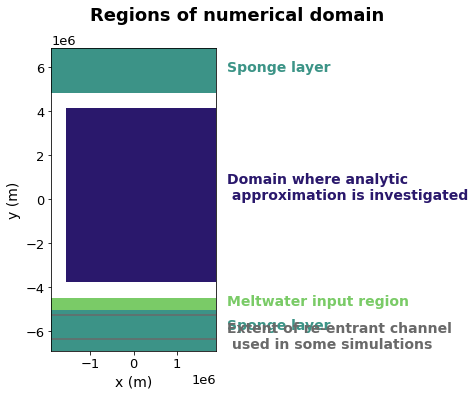

In [6]:
from matplotlib import rcParams
scaling=1 #use 1 if half width plot once put into latex. use 1/2 if full width once put into latex

rcParams.update({
    'font.size': 10 * scaling,
    'axes.titlesize': 15 * scaling,
    'axes.labelsize': 14 * scaling,
    'xtick.labelsize': 13 * scaling,
    'ytick.labelsize': 13 * scaling,
    'legend.fontsize': 11 * scaling,
})

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6.47,5), constrained_layout=True)

cf=diagram.plot(ax=ax,add_colorbar=False,cmap=cmocean.cm.haline,vmax=3,edgecolor='face')
ax.set_title('')
ax.axhline(h1_xr.y[5],color='dimgrey')
ax.axhline(h1_xr.y[15],color='dimgrey')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

cmap = cf.get_cmap()
colors = cmap(np.linspace(0, 1, 66)) #2 times 33

textstr = 'Domain where analytic \n approximation is investigated'
plt.xlim(h1_xr.x[0],h1_xr.x[-1])
plt.ylim(h1_xr.y[0],h1_xr.y[-1])
plt.text(h1_xr.x[-1]+250000, 0, textstr, fontsize=14,weight='bold',color=colors[0])

textstr = 'Sponge layer'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[int(ny//7/2)], textstr, fontsize=14,weight='bold',color=colors[1*33])
plt.text(h1_xr.x[-1]+250000, h1_xr.y[-2-int(ny//7/2)], textstr, fontsize=14,weight='bold',color=colors[1*33])

textstr = 'Meltwater input region'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[int(ny//7)+1], textstr, fontsize=14,weight='bold',color=colors[int(1.5*33)])

textstr = 'Extent of re-entrant channel \n used in some simulations'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[1], textstr, fontsize=14,weight='bold',color='dimgrey')
fig.suptitle('Regions of numerical domain', fontsize=18*scaling, y=1.07, fontweight='bold')

#import matplotlib
#matplotlib.pyplot.savefig('domain_diagram_smallerdomain_updated.pdf', dpi=1000,bbox_inches='tight',facecolor='white',transparent=False)

In [7]:
tau_0=0.01 #amplitude wind stress
tau_min=5 #smallest grid point where there will be wind in channel
tau_max=15 #largest grid point where there will be wind in channel

tau_x=np.zeros(ny)
for i in range(tau_min,tau_max):
    tau_x[i] = tau_0*np.sin(np.pi*uy[0,i]/(L_y/((ny)/(15-5))))

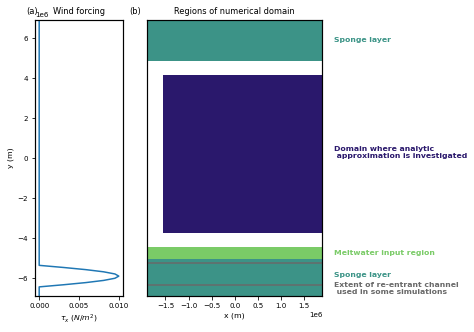

In [9]:
fig,(ax1,ax)=plt.subplots(nrows=1,ncols=2,figsize=(6.47,4.5), constrained_layout=True, gridspec_kw={'width_ratios': [0.5, 1]})

scaling=.55 #use 1 if half width plot once put into latex. use 1/2 if full width once put into latex

rcParams.update({
    'font.size': 10 * scaling,
    'axes.titlesize': 15 * scaling,
    'axes.labelsize': 14 * scaling,
    'xtick.labelsize': 13 * scaling,
    'ytick.labelsize': 13 * scaling,
    'legend.fontsize': 11 * scaling,
})



ax1.plot(tau_x, h1_xr.y)
ax1.grid(False)
ax1.set_ylabel('y (m)')
ax1.set_xlabel(r'$\tau_x$ ($N/m^2$)')
ax1.set_title('Wind forcing')
ax1.set_title('(a)',loc='left',x=-0.1)
ax.set_title('(b)',loc='left',x=-0.1)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_linewidth(1.2)
    ax1.spines[spine].set_linewidth(1.2)



ax1.set_ylim(h1_xr.y[0],h1_xr.y[-1])

cf=diagram.plot(ax=ax,add_colorbar=False,cmap=cmocean.cm.haline,vmax=3,edgecolor='face')
ax.set_title('')
ax.axhline(h1_xr.y[5],color='dimgrey')
ax.axhline(h1_xr.y[15],color='dimgrey')
ax.set_xlabel('x (m)')
ax.set_ylabel('')
ax.set_title(r'Regions of numerical domain')

ax.set_yticks([])


cmap = cf.get_cmap()
colors = cmap(np.linspace(0, 1, 66)) #2 times 33

textstr = 'Domain where analytic \n approximation is investigated'
plt.xlim(h1_xr.x[0],h1_xr.x[-1])
plt.ylim(h1_xr.y[0],h1_xr.y[-1])
plt.text(h1_xr.x[-1]+250000, 0, textstr, fontsize=14*scaling,weight='bold',color=colors[0])

textstr = 'Sponge layer'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[int(ny//7/2)], textstr, fontsize=14*scaling,weight='bold',color=colors[1*33])
plt.text(h1_xr.x[-1]+250000, h1_xr.y[-2-int(ny//7/2)], textstr, fontsize=14*scaling,weight='bold',color=colors[1*33])

textstr = 'Meltwater input region'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[int(ny//7)+1], textstr, fontsize=14*scaling,weight='bold',color=colors[int(1.5*33)])

textstr = 'Extent of re-entrant channel \n used in some simulations'
plt.text(h1_xr.x[-1]+250000, h1_xr.y[1], textstr, fontsize=14*scaling,weight='bold',color='dimgrey')

import matplotlib
matplotlib.pyplot.savefig('domain_diagram_revisions.pdf', dpi=500,bbox_inches='tight',facecolor='white',transparent=False)